In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials
import statsmodels.api as sm

In [2]:
# Setting to display full data
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)  

In [3]:
# Set the start and end date for the entire project
START_DATE = '2010-01-01' 
END_DATE = '2020-01-01'

In [4]:
# Download S&P500 data using yfinance,
sp500 = yf.download('^GSPC', start=START_DATE,end=END_DATE)
sp500.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [5]:
# Extract Adj Close column
sp500= sp500['Adj Close']
sp500.head()

Date
2010-01-04    1132.989990
2010-01-05    1136.520020
2010-01-06    1137.140015
2010-01-07    1141.689941
2010-01-08    1144.979980
Name: Adj Close, dtype: float64

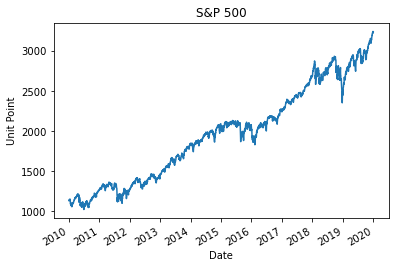

In [6]:
sp500.plot(title='S&P 500')
plt.ylabel('Unit Point')
plt.show()

In [7]:
# Previously, the data was daily. We make it monthly and calculate the monthly return using pct_change()
sp500= sp500.resample('M').last().pct_change().dropna()
sp500.head()

Date
2010-02-28    0.028514
2010-03-31    0.058796
2010-04-30    0.014759
2010-05-31   -0.081976
2010-06-30   -0.053882
Freq: M, Name: Adj Close, dtype: float64

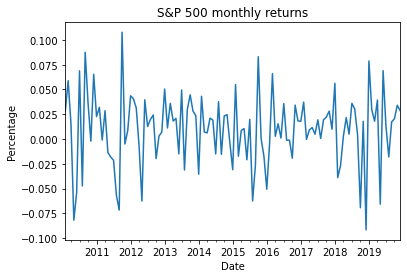

In [8]:
sp500.plot(title='S&P 500 monthly returns')
plt.ylabel('Percentage')
plt.show()
# 0.1 equivalent to 10%

In [9]:
# Calculate S&P risk using standard deviation
sp500.std()

0.0358604729711153

In [10]:
sp500.mean()

0.009937002501489472

### Portfolio consists of four stocks: Walmart (WMT), Netflix (NFLX), Goldman Sachs (GS) and Novartis (NVS)

In [11]:
stocks = ['WMT', 'NFLX', 'GS','NVS']
# Import stock data from Yahoo Finance
yahoo_financials = YahooFinancials(stocks)
data = yahoo_financials.get_historical_price_data(start_date='2010-01-01', end_date='2020-01-01', time_interval='monthly')
adj_close = pd.DataFrame({a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in stocks})

In [12]:
adj_close.head()

,WMT,NFLX,GS,NVS
2010-01-01,40.359360,8.892857,124.231819,30.977274
2010-02-01,40.842773,9.435714,130.605530,32.013130
2010-03-01,41.998482,10.534286,142.853760,31.307131
2010-04-01,40.746346,14.128571,121.563438,30.518614
2010-05-01,38.406700,15.878571,120.776428,27.013620


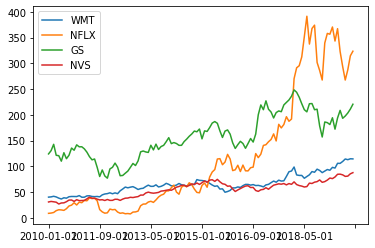

In [13]:
adj_close.plot()
plt.show()

In [14]:
# Calculate monthly return
monthly_return=adj_close.pct_change().dropna()
monthly_return.head()

,WMT,NFLX,GS,NVS
2010-02-01,0.011978,0.061044,0.051305,0.033439
2010-03-01,0.028297,0.116427,0.093780,-0.022053
2010-04-01,-0.029814,0.341199,-0.149036,-0.025186
2010-05-01,-0.057420,0.123862,-0.006474,-0.114848
2010-06-01,-0.043725,-0.022492,-0.087770,0.073539


In [15]:
# Calculate mean monthly return for each stock
monthly_portfolio_mean = monthly_return.mean()
monthly_portfolio_mean

WMT     0.009956
NFLX    0.044474
GS      0.007860
NVS     0.009926
dtype: float64

In [16]:
# Netflix seems to be the best performer

### Calculate portfolio return

In [17]:
# Compute portfolio return. The allocation for the portfolio is 25% each 
portfolio_allocation = np.array([0.25,0.25,0.25,0.25])

allocated_monthly_returns = (portfolio_allocation * monthly_portfolio_mean)

portfolio_return = np.sum(allocated_monthly_returns)
portfolio_return

0.018053862040789324

In [18]:
# Monthly portfolio return is 1.8% 
# Annualize monthly return by this formula: [((1 + R)^12) - 1] x 100
# R in our case is 0.018. Using formula above, our yearly return is 
R = 0.018
print(((1 + 0.018)**12 - 1) * 100 )
# About 23.87% yearly

23.87205315755283


### Calculate portfolio risk

In [19]:
# Calculate the monthly covariance and then we annualise it by multiplying for 12
matrix_covariance_portfolio = monthly_return
matrix_covariance_portfolio = (matrix_covariance_portfolio.cov())*12

matrix_covariance_portfolio

,WMT,NFLX,GS,NVS
WMT,0.027951,-0.005821,0.006048,0.007460
NFLX,-0.005821,0.359329,0.051869,0.010241
GS,0.006048,0.051869,0.073592,0.007394
NVS,0.007460,0.010241,0.007394,0.027303


In [20]:
# Calculate the standard deviation which will indicate the risk of our portfolio
# The formula for standard deviation of portfolio
# Portfolio allocation array * Portfolio matrix covariance * Transpose of portfolio allocation array 

portfolio_variance = np.dot(portfolio_allocation.T,np.dot(matrix_covariance_portfolio, portfolio_allocation))

portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

0.20039906307483082

In [21]:
# The risk of the portfolio is about 20%

### Optimized portfolio

In [22]:
# In the previous calculation, the portfolio allocation is 25% evenly. How do we know it is the best allocation?
# To find an optimize portfolio allocation, one of the approach is using Sharpe Ratio
# Holding risk constant, the higher Sharpe Ratio earns a better portfolio return 
# We will generate 1000 portfolio with different level of allocation, calculate portfolio risk, portfolio return and Sharpe Ratio
# The best portfolio has highest return, lowest portfolio risk and highest Sharpe Ratio

In [23]:
number_of_portfolios = 1000
RF = 0

# Define variables
portfolio_returns = []
portfolio_risk = []
sharpe_ratio_port = []
portfolio_weights = []

for portfolio in range (number_of_portfolios):
    weights = np.random.random_sample((len(stocks)))  # Generate 4 random weights correspond to 4 stocks
    weights = weights / np.sum(weights)               # Make the weight having sum equal 1

    annualize_return = np.sum((monthly_return.mean() * weights) * 12) 
    portfolio_returns.append(annualize_return)
    
  #variance
    matrix_covariance_portfolio = (monthly_return.cov())*12
    portfolio_variance = np.dot(weights.T,np.dot(matrix_covariance_portfolio, weights))
    portfolio_standard_deviation= np.sqrt(portfolio_variance) 
    portfolio_risk.append(portfolio_standard_deviation)
    
  #sharpe_ratio
    sharpe_ratio = ((annualize_return- RF)/portfolio_standard_deviation)
    sharpe_ratio_port.append(sharpe_ratio)

    portfolio_weights.append(weights)

In [24]:
portfolio_risk = np.array(portfolio_risk)
portfolio_returns = np.array(portfolio_returns)
sharpe_ratio_port = np.array(sharpe_ratio_port)

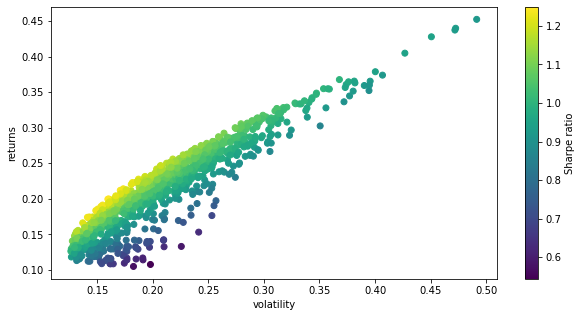

In [25]:
plt.figure(figsize=(10, 5))
plt.scatter(portfolio_risk, portfolio_returns, c=portfolio_returns / portfolio_risk) 
plt.xlabel('volatility')
plt.ylabel('returns')
plt.colorbar(label='Sharpe ratio')
plt.show()

In [26]:
porfolio_metrics = [portfolio_returns,portfolio_risk,sharpe_ratio_port, portfolio_weights] 
#from Python list we create a Pandas DataFrame
portfolio_dfs = pd.DataFrame(porfolio_metrics)
portfolio_dfs = portfolio_dfs.T
portfolio_dfs.columns = ['Port Returns','Port Risk','Sharpe Ratio','Portfolio Weights']
portfolio_dfs.head()

,Port Returns,Port Risk,Sharpe Ratio,Portfolio Weights
0,0.200294,0.190325,1.05238,"[0.2890253253737348, 0.21377069446781874, 0.30430957782860074, 0.19289440232984564]"
1,0.252558,0.228321,1.10615,"[0.48054264569353994, 0.3303921108115607, 0.14906874166435666, 0.03999650183054243]"
2,0.156534,0.144468,1.08352,"[0.3662430959064755, 0.10474387404100176, 0.24736393627368486, 0.28164909377883784]"
3,0.242695,0.232712,1.0429,"[0.37118037067597376, 0.31401506290884046, 0.27146207360071284, 0.043342492814472944]"
4,0.25619,0.223721,1.14513,"[0.507135648052123, 0.3342127428842181, 0.0668155629836587, 0.09183604608000015]"


In [27]:
# Convert from object to float the first three columns
for col in ['Port Returns', 'Port Risk', 'Sharpe Ratio']:
    portfolio_dfs[col] = portfolio_dfs[col].astype(float)
portfolio_dfs.head()

,Port Returns,Port Risk,Sharpe Ratio,Portfolio Weights
0,0.200294,0.190325,1.052376,"[0.2890253253737348, 0.21377069446781874, 0.30430957782860074, 0.19289440232984564]"
1,0.252558,0.228321,1.106154,"[0.48054264569353994, 0.3303921108115607, 0.14906874166435666, 0.03999650183054243]"
2,0.156534,0.144468,1.083523,"[0.3662430959064755, 0.10474387404100176, 0.24736393627368486, 0.28164909377883784]"
3,0.242695,0.232712,1.042901,"[0.37118037067597376, 0.31401506290884046, 0.27146207360071284, 0.043342492814472944]"
4,0.256190,0.223721,1.145134,"[0.507135648052123, 0.3342127428842181, 0.0668155629836587, 0.09183604608000015]"


In [28]:
#portfolio with the highest Sharpe Ratio
Highest_sharpe_port = portfolio_dfs.iloc[portfolio_dfs['Sharpe Ratio'].idxmax()]
#portfolio with the minimum risk 
min_risk = portfolio_dfs.iloc[portfolio_dfs['Port Risk'].idxmin()]

print(Highest_sharpe_port)
print(min_risk)

Port Returns                                                                                    0.199455
Port Risk                                                                                       0.159654
Sharpe Ratio                                                                                      1.2493
Portfolio Weights    [0.4951951523700502, 0.19414399042272606, 0.012918164731066238, 0.2977426924761575]
Name: 615, dtype: object
Port Returns                                                                                    0.126286
Port Risk                                                                                       0.126374
Sharpe Ratio                                                                                    0.999308
Portfolio Weights    [0.39889962517747013, 0.025680923887923864, 0.1458359592328362, 0.4295834917017698]
Name: 791, dtype: object


### Calculate individual stock return using CAPM Model

#### Walmart (WMT)

In [29]:
MARKET_BENCHMARK = '^GSPC' 

In [30]:
# Download data
wmt = yf.download(['WMT',MARKET_BENCHMARK], start=START_DATE,end=END_DATE, adjusted=True, progress=False)
wmt.head()

Adj Close                   Close                    High  \
                  WMT        ^GSPC        WMT        ^GSPC        WMT   
Date                                                                    
2010-01-04  40.963642  1132.989990  54.230000  1132.989990  54.669998   
2010-01-05  40.555740  1136.520020  53.689999  1136.520020  54.189999   
2010-01-06  40.465096  1137.140015  53.570000  1137.140015  53.830002   
2010-01-07  40.487751  1141.689941  53.599998  1141.689941  53.750000   
2010-01-08  40.283821  1144.979980  53.330002  1144.979980  53.529999   

                               Low                    Open               \
                  ^GSPC        WMT        ^GSPC        WMT        ^GSPC   
Date                                                                      
2010-01-04  1133.869995  53.669998  1116.560059  53.740002  1116.560059   
2010-01-05  1136.630005  53.570000  1129.660034  54.090000  1132.660034   
2010-01-06  1139.189941  53.419998  1133.949951  53.500000  1135.709961   
2010-01-07  1142.459961  53.259998  1131.319946  53.720001  1136.270020   
2010-01-08  1145.390015  53.020000  1136.219971  53.430000  1140.520020   

              Volume              
                 WMT       ^GSPC  
Date                              
2010-01-04  20753100  3991400000  
2010-01-05  15648400  2491020000  
2010-01-06  12517200  4972660000  
2010-01-07  10662700  5270680000  
2010-01-08  11363200  4389590000

In [31]:
# Only need Adj Close column
wmt = wmt['Adj Close']
wmt.head()

,WMT,^GSPC
Date,,
2010-01-04,40.963642,1132.989990
2010-01-05,40.555740,1136.520020
2010-01-06,40.465096,1137.140015
2010-01-07,40.487751,1141.689941
2010-01-08,40.283821,1144.979980


In [32]:
# Resample data to monthly and calculate monthly return
wmt_return = wmt.resample('M').last().pct_change().dropna()
wmt_return.head()

,WMT,^GSPC
Date,,
2010-02-28,0.011978,0.028514
2010-03-31,0.034093,0.058796
2010-04-30,-0.035252,0.014759
2010-05-31,-0.051944,-0.081976
2010-06-30,-0.049249,-0.053882


In [33]:
# Rename ^GSPC to market
wmt_return = wmt_return.rename(columns={MARKET_BENCHMARK: 'market'})
wmt_return.head()

,WMT,market
Date,,
2010-02-28,0.011978,0.028514
2010-03-31,0.034093,0.058796
2010-04-30,-0.035252,0.014759
2010-05-31,-0.051944,-0.081976
2010-06-30,-0.049249,-0.053882


In [34]:
wmt_return.cov()

,WMT,market
WMT,0.002283,0.000531
market,0.000531,0.001286


In [35]:
# Use iloc to get the upper right value from covariance
wmt_covariance = wmt_return.cov().iloc[0,1]     
wmt_covariance

0.0005313842574661779

In [36]:
# Calculate market variance
benchmark_variance = wmt_return.market.var()
benchmark_variance

0.001285973521712091

In [37]:
# Calculate beta
wmt_beta = wmt_covariance / benchmark_variance
wmt_beta

0.41321555109370783

In [38]:
# Extract WMT column by using pop method
wmt_y = wmt_return.pop('WMT')   
wmt_y.head()

Date
2010-02-28    0.011978
2010-03-31    0.034093
2010-04-30   -0.035252
2010-05-31   -0.051944
2010-06-30   -0.049249
Freq: M, Name: WMT, dtype: float64

In [39]:
# Added the constant to the features (effectively adding a column of ones) with the add_constant function
wmt_return = sm.add_constant(wmt_return)
wmt_return.head()

,const,market
Date,,
2010-02-28,1.0,0.028514
2010-03-31,1.0,0.058796
2010-04-30,1.0,0.014759
2010-05-31,1.0,-0.081976
2010-06-30,1.0,-0.053882


In [40]:
capm_model = sm.OLS(wmt_y, wmt_return).fit()
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    WMT   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     12.45
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           0.000599
Time:                        14:06:36   Log-Likelihood:                 199.55
No. Observations:                 119   AIC:                            -395.1
Df Residuals:                     117   BIC:                            -389.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0059      0.004      1.351      0.1

In [41]:
# These results indicate that the beta (denoted as market here) is equal to 1.67, which means that Amazon's returns are 67% more volatile than the market (proxied by S&P 500). The value of the intercept is relatively small and statistically insignificant at the 5% significance level.

#### Netflix (NFLX)

In [42]:
# We proceed similar to steps above, but we combine steps into one cell
nflx = yf.download(['NFLX',MARKET_BENCHMARK], start=START_DATE,end=END_DATE, adjusted=True, progress=False)
nflx = nflx['Adj Close']
nflx_return = nflx.resample('M').last().pct_change().dropna()
nflx_return = nflx_return.rename(columns={MARKET_BENCHMARK: 'market'})
nflx_covariance = nflx_return.cov().iloc[0,1]  
nflx_beta = nflx_covariance / benchmark_variance
nflx_y = nflx_return.pop('NFLX')
nflx_return = sm.add_constant(nflx_return)
capm_model = sm.OLS(nflx_y, nflx_return).fit()
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NFLX   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     7.772
Date:                Wed, 15 Dec 2021   Prob (F-statistic):            0.00619
Time:                        14:06:36   Log-Likelihood:                 44.226
No. Observations:                 119   AIC:                            -84.45
Df Residuals:                     117   BIC:                            -78.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0325      0.016      2.030      0.0

#### Goldman Sachs (GS)

In [43]:
gs = yf.download(['GS',MARKET_BENCHMARK], start=START_DATE,end=END_DATE, adjusted=True, progress=False)
gs = gs['Adj Close']
gs_return = gs.resample('M').last().pct_change().dropna()
gs_return = gs_return.rename(columns={MARKET_BENCHMARK: 'market'})
gs_covariance = gs_return.cov().iloc[0,1]  
gs_beta = gs_covariance / benchmark_variance
gs_y = gs_return.pop('GS')
gs_return = sm.add_constant(gs_return)
capm_model = sm.OLS(gs_y, gs_return).fit()
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     GS   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     96.13
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           6.30e-17
Time:                        14:06:36   Log-Likelihood:                 170.80
No. Observations:                 119   AIC:                            -337.6
Df Residuals:                     117   BIC:                            -332.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0067      0.006     -1.210      0.2

#### Novartis (NVS)

In [44]:
nvs = yf.download(['NVS',MARKET_BENCHMARK], start=START_DATE,end=END_DATE, adjusted=True, progress=False)
nvs = nvs['Adj Close']
nvs_return = nvs.resample('M').last().pct_change().dropna()
nvs_return = nvs_return.rename(columns={MARKET_BENCHMARK: 'market'})
nvs_covariance = nvs_return.cov().iloc[0,1]  
nvs_beta = nvs_covariance / benchmark_variance
nvs_y = nvs_return.pop('NVS')
nvs_return = sm.add_constant(nvs_return)
capm_model = sm.OLS(nvs_y, nvs_return).fit()
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    NVS   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     27.90
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           5.99e-07
Time:                        14:06:37   Log-Likelihood:                 208.11
No. Observations:                 119   AIC:                            -412.2
Df Residuals:                     117   BIC:                            -406.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.004      1.034      0.3